# Bài tập Decision Tree

## Sử dụng Decision Tree để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
df = pd.read_csv('Iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [68]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
dct = DecisionTreeClassifier(max_leaf_nodes=3)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [70]:
y_pred = dct.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [72]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [73]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.drop('Species', axis=1).columns)
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

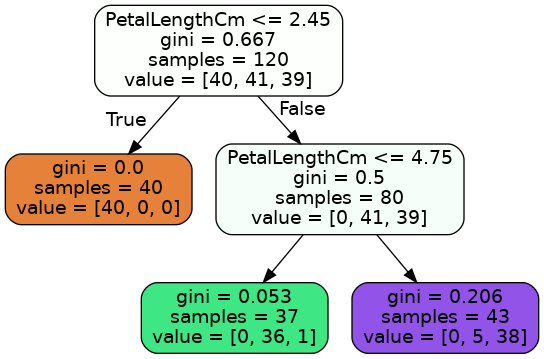

In [74]:
dot_data = StringIO()  
export_graphviz(dct, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())